To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/HW%202.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Part I: Conceptual exercises

**1. Label each case as describing either data mining (DM), or the use of the results of data mining (Use).**

a) Choose customers who are most likely to respond to an on-line ad(Use).

b) Discover rules that indicate when an account has been defrauded(DM).

c) Find patterns indicating what customer behavior is more likely to lead to response to an on-line ad(DM).

d) Estimate probability of default for a credit application(use).

e) Predict whether a customer is pregnant(use)


**2)  Plumbing Inc. has been selling plumbing supplies for the last 20 years. The owner, Joe, decides that next year it is finally time to diversify by adding gardening tools to his products. Having had success using customer data to build predictive models to guide direct mail campaigns for special plumbing offers, he considers that data mining could help him to identify a subset of customers who should be good prospects for his new set of products. Is Joe ready to solve this as a supervised learning problem? If yes – what would you suggest as the target variable?  If no  - why not?  What would you recommend that Joe do to achieve his business goal? **

In [0]:
# Your answer goes here
# It is an supervised problem. But Joe could not use the previous predictive model since plumbing and gardening tools are different tools. 
# Joe is not ready to solve the problems now. He need to do more research.
# I think the target variable is the probability of a certain customer would buy the gardening tools.
# Joe should collect more related data like if they have garden in their house or do they like flowers. 


# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [244]:
!git clone https://github.com/bwolfson2/foster_2020 
%cd foster_2020/Homeworks/

Cloning into 'foster_2020'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 243 (delta 31), reused 115 (delta 12), pack-reused 109
Receiving objects: 100% (243/243), 58.58 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (114/114), done.
/content/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks


In [0]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 

### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [246]:
# Put your answer here
csv_data = pd.read_csv(data_path, low_memory = False) 
df = pd.DataFrame(csv_data)
count_row = df.shape[0]
print("There are " + str(count_row) + ' rows')
df.head(5)

There are 110527 rows


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [247]:
# Put your answer here
print(df.isnull().values.any())
df.isnull().sum()
#So there are not Na or NaN values

False


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [0]:
# Put your answer here
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [0]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [249]:
# Put your answer here
df['ScheduledDay']=df['ScheduledDay'].dt.normalize()
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [0]:
# Put your answer here
df['TimeInAdvance'] = df['AppointmentDay']-df['ScheduledDay']

In [0]:
df['TimeInAdvance']=df['TimeInAdvance'].dt.days

In [0]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or wrong values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [0]:
# Put your answer here
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


I noticed that some rows in 'TimeInAdvance' column is below zero. This will be removed and only the time that 'AppointmentDay' is after 'ScheduledDay' would be kept. So let us remove the negative value of 'TimeInAdvance'.

In [252]:
indexNames = df[(df.TimeInAdvance < 0)|(df.Age <0)].index
df.drop(indexNames , inplace=True)
new_row = df.shape[0]
print('The number of rows droped is '+ str(count_row-new_row))


The number of rows droped is 6


### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [253]:
# Put your answer here
import numpy as np
df['IsFemale']=np.where(df['Gender']=='F',1,0)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110523,3.596270e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110524,1.557660e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,1
110525,9.213490e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,1


In [0]:
#Drop the colunms named Gender
df.drop(['Gender'], axis=1,inplace=True)

In [0]:
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [255]:
# Put your answer here
df['No-show']=np.where(df['No-show']=='Yes',1,0)
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,35,1
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,35,1
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,41,1
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,41,1


### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [256]:
# Put your answer here
groups=df.groupby('Neighborhood')
df2 = groups.size()
print('There are ' + str(df2.shape[0])+ ' unique neighborhoods')

There are 81 unique neighborhoods


In [0]:
# The 5 most common neighborhoods
df2.sort_values(ascending=False).head(5)

Neighborhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
ITARARÉ            3514
dtype: int64

In [0]:
# The 5 least common neighborhoods
df2.sort_values(ascending=False).tail(5)

Neighborhood
ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
dtype: int64

** 10. (Optional, extra points) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [0]:
# Put your (optional) answer here
df.loc[df['Neighborhood'].value_counts()[df['Neighborhood']].values<500, 'Neighborhood'] ="OTHER"

** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [0]:
# Put your answer here
df = df.join(pd.get_dummies(df['Neighborhood']))

In [0]:
df.drop(['Neighborhood'], axis=1,inplace=True)

In [0]:
df

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,1,0,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,1,0,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,1,0,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,1,0,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientsId column. How many patients have made more than one appointment?  **

In [260]:
patient = (df['PatientId'].value_counts()>1).sum()
print('The number of patients who hade more than one appointment is ' + str(patient))

The number of patients who hade more than one appointment is 24494


As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional, extra points) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [0]:
# Put your (optional) answer here
df.sort_values(by=['PatientId','ScheduledDay'],inplace=True)
df['PreviousNoShows'] = df.groupby(by=['PatientId'])['No-show'].apply(lambda x: x.cumsum()-x)

In [0]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShows
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.00000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,10.184345,0.649976,0.020467,0.017255,0.007763,0.02509,0.023208,0.030166,0.007682,0.012441,0.012649,0.020060,0.005067,0.007682,0.004868,0.006171,0.017092,0.006334,0.009690,0.018259,0.009690,0.017056,0.020503,0.009564,0.031795,0.022702,0.069824,0.035079,0.025814,0.012912,0.006279,0.052524,0.017209,0.005827,0.007456,0.020485,0.058098,0.007257,0.009365,0.011654,0.014052,0.007555,0.040083,0.020032,0.004578,0.028329,0.012052,0.023263,0.024828,0.011545,0.004949,0.013020,0.016612,0.017888,0.022150,0.028329,0.007700,0.234164
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15.255153,0.476979,0.141591,0.130219,0.087767,0.15640,0.150565,0.171045,0.087309,0.110844,0.111755,0.140205,0.071002,0.087309,0.069600,0.078312,0.129614,0.079332,0.097962,0.133887,0.097962,0.129479,0.141713,0.097326,0.175454,0.148951,0.254851,0.183981,0.158581,0.112894,0.078994,0.223082,0.130051,0.076112,0.086024,0.141652,0.233929,0.084876,0.096318,0.107323,0.117704,0.086592,0.196155,0.140112,0.067508,0.165913,0.109119,0.150737,0.155601,0.106828,0.070177,0.113361,0.127814,0.132545,0.147171,0.165913,0.087411,0.683751
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [0]:
# Put your answer here
df.drop('PatientId',axis=1,inplace=True)
df.drop('AppointmentID',axis=1,inplace=True)
df.drop('ScheduledDay',axis=1,inplace=True)
df.drop('AppointmentDay',axis=1,inplace=True)

In [0]:
df.head(5)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHER,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShows
100517,44,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105430,39,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3950,33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73303,12,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73228,14,0,0,0,0,0,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [0]:
feature_cols = ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received',  'TimeInAdvance', 'IsFemale',
       'ANDORINHAS', 'BELA VISTA', 'BENTO FERREIRA', 'BONFIM', 'CARATOÍRA',
       'CENTRO', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DO CABRAL', 'DO QUADRO', 'ESTRELINHA', 'FONTE GRANDE',
       'FORTE SÃO JOÃO', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO PRÍNCIPE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA',
       'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ',
       'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'NOVA PALESTINA', 'OTHER',
       'PARQUE MOSCOSO', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO',
       'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CLARA', 'SANTA MARTHA',
       'SANTA TEREZA', 'SANTO ANDRÉ', 'SANTO ANTÔNIO', 'SANTOS DUMONT',
       'SANTOS REIS', 'SÃO BENEDITO', 'SÃO CRISTÓVÃO', 'SÃO JOSÉ', 'SÃO PEDRO',
       'TABUAZEIRO', 'VILA RUBIM', 'PreviousNoShows']
X = df[feature_cols] 
Y = df['No-show'] # Target variable

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [0]:
from sklearn.metrics import accuracy_score

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # 80% training and 20% test

model = DecisionTreeClassifier(max_depth=5) # We can use loop to set different max-depth. Here, I set 5 as the max-depth
model.fit(X_train, Y_train)
print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )

Accuracy on training = 0.8010


In [267]:
scores = cross_val_score(model, X, Y, scoring="accuracy", cv=5)
print ("Cross Validated Accuracy: %0.3f +/- %0.5f" % (scores.mean(), scores.std()))

Cross Validated Accuracy: 0.800 +/- 0.00021


In [268]:
print(cross_val_score(model, X, Y, cv=5))

[0.80063334 0.80017191 0.79985523 0.80044336 0.80030764]


** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

In [279]:
list1=[]
list2=[]
for i in range(13):
  k = np.power(2,i)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 
  model = DecisionTreeClassifier(min_samples_leaf=k)
  model = model.fit(X_train,Y_train)
  scores = cross_val_score(model, X, Y, scoring="accuracy", cv=5)
  list1.append(scores.mean())
  list2.append(accuracy_score(model.predict(X_train), Y_train))
  print("When min_samples_leaf is "+ str(k) +":")
  print ("Cross Validated Accuracy: %0.3f +/- %0.5f" % (scores.mean(), scores.std()))  
  print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )

When min_samples_leaf is 1:
Cross Validated Accuracy: 0.729 +/- 0.00204
Accuracy on training = 0.9731
When min_samples_leaf is 2:
Cross Validated Accuracy: 0.751 +/- 0.00173
Accuracy on training = 0.8963
When min_samples_leaf is 4:
Cross Validated Accuracy: 0.762 +/- 0.00128
Accuracy on training = 0.8583
When min_samples_leaf is 8:
Cross Validated Accuracy: 0.775 +/- 0.00145
Accuracy on training = 0.8317
When min_samples_leaf is 16:
Cross Validated Accuracy: 0.786 +/- 0.00160
Accuracy on training = 0.8158
When min_samples_leaf is 32:
Cross Validated Accuracy: 0.794 +/- 0.00205
Accuracy on training = 0.8080
When min_samples_leaf is 64:
Cross Validated Accuracy: 0.799 +/- 0.00110
Accuracy on training = 0.8045
When min_samples_leaf is 128:
Cross Validated Accuracy: 0.800 +/- 0.00131
Accuracy on training = 0.8014
When min_samples_leaf is 256:
Cross Validated Accuracy: 0.800 +/- 0.00034
Accuracy on training = 0.8006
When min_samples_leaf is 512:
Cross Validated Accuracy: 0.800 +/- 0.00035
A

In [0]:
min_leaf_num = [2**i for i in range(13)]

In [0]:
res1=[]
for i in list1:
  res1.append(i*100)
res2=[]
for i in list2:
  res2.append(i*100)


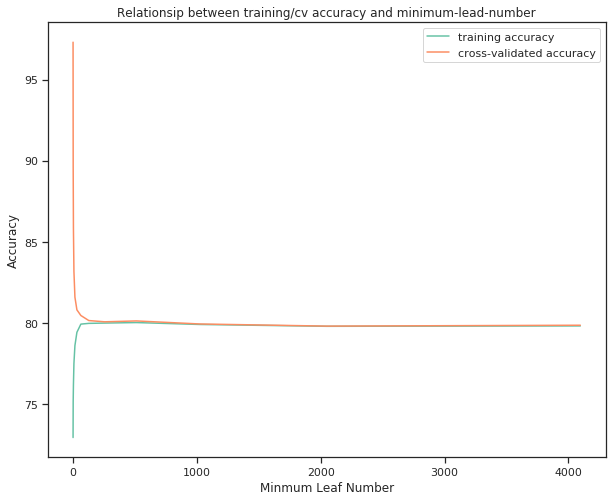

In [282]:
plt.figure(figsize=(10,8))

plt.plot((min_leaf_num), res1, label='training accuracy')
plt.plot((min_leaf_num), res2, label='cross-validated accuracy')
plt.xlabel('Minmum Leaf Number')
plt.ylabel('Accuracy')
plt.title('Relationsip between training/cv accuracy and minimum-lead-number')
plt.legend()
plt.show()

It is hard to find the minimum leaf number from this chart. So let us use log(minimum leaf number) to check.

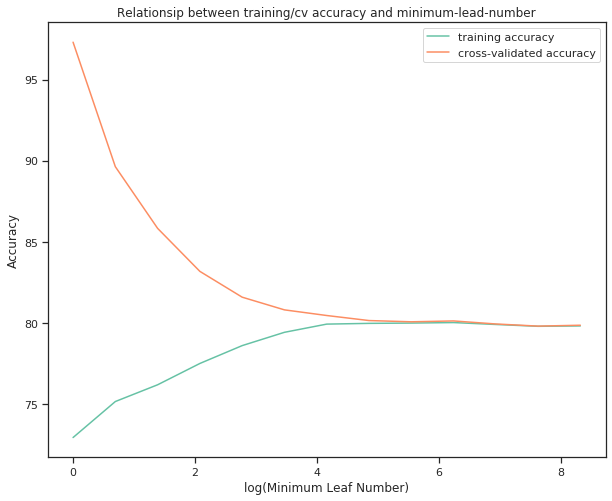

In [283]:
x = []
for i in min_leaf_num:
  x.append(np.log(i))

plt.figure(figsize=(10,8))
plt.plot(x, res1, label='training accuracy')
plt.plot(x, res2, label='cross-validated accuracy')
plt.xlabel('log(Minimum Leaf Number)')
plt.ylabel('Accuracy')
plt.title('Relationsip between training/cv accuracy and minimum-lead-number')
plt.legend()
plt.show()  


It show when there are 2^5 leaves, the training accuracy and cross-validated accuracy are met. So this is the appropraite minimum-leaf-number.

** 17. (Optional, extra points) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

In [0]:
# Put your (optional) answer here (use 'markdown' rather than 'code').